 *Data Loading and Preparation*

In [2]:
import pandas as pd

# Load the dataset
file_path = '/Users/harikakakumanu/Downloads/7817_1.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())

# Basic info about the dataset
print(df.info())


                     id       asins   brand                  categories  \
0  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
1  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
2  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
3  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
4  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   

  colors             dateAdded           dateUpdated  \
0    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
1    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
2    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
3    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
4    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   

                  dimension  ean                         keys  ...  \
0  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   
1  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   
2 

In [3]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harikakakumanu/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
import re
from nltk.corpus import stopwords

# Example function to clean text
def clean_text(text):
    text = re.sub(r'<[^>]+>', '', text)  # Remove HTML tags
    text = text.lower()  # Lowercase text
    text = re.sub(r'[^a-z0-9\s]', '', text)  # Remove punctuation and special characters
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])  # Remove stopwords
    return text

df['cleaned_text'] = df['reviews.text'].apply(clean_text)


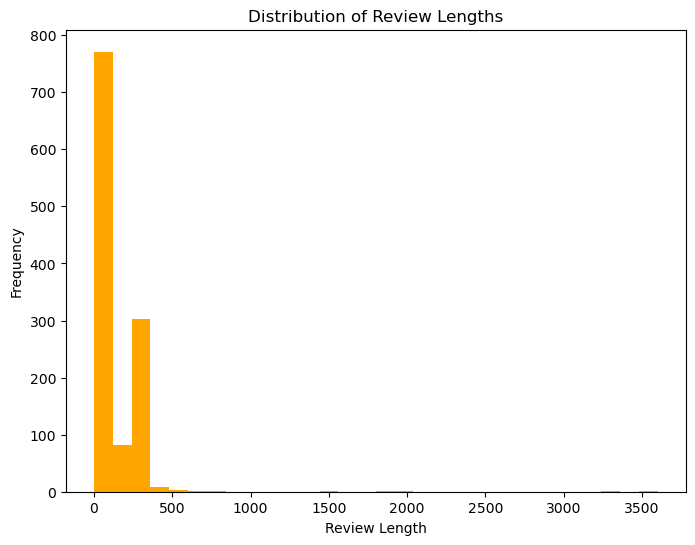

In [24]:
# Distribution of Review Lengths
plt.figure(figsize=(8, 6))
df_filtered['review_length'] = df_filtered['cleaned_text'].apply(lambda x: len(x.split()))
plt.hist(df_filtered['review_length'], bins=30, color='orange')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()


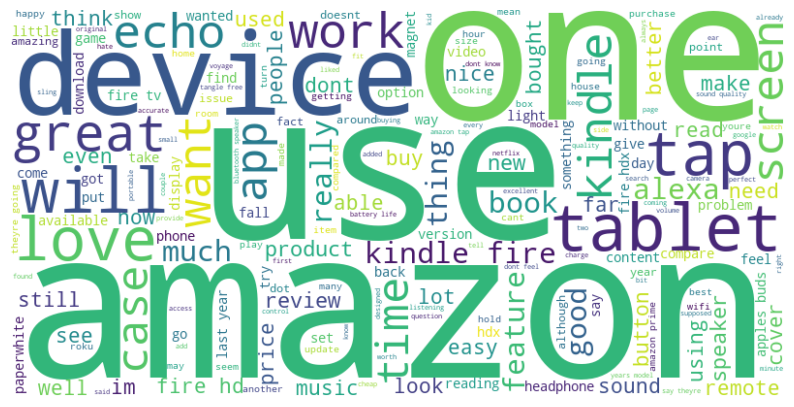

In [21]:
# Generate word cloud
from wordcloud import WordCloud

text = ' '.join(df_filtered['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

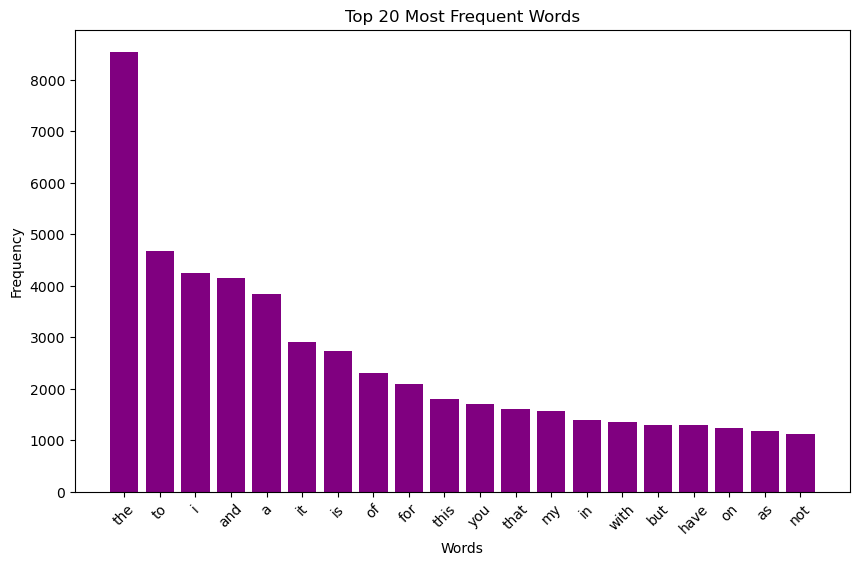

In [25]:
# Top N Most Frequent Words
from collections import Counter

word_counts = Counter(text.split())
top_n_words = word_counts.most_common(20)

plt.figure(figsize=(10, 6))
plt.bar([word[0] for word in top_n_words], [word[1] for word in top_n_words], color='purple')
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [5]:
df = df.dropna(subset=['reviews.rating'])  # Example: Drop rows where rating is missing


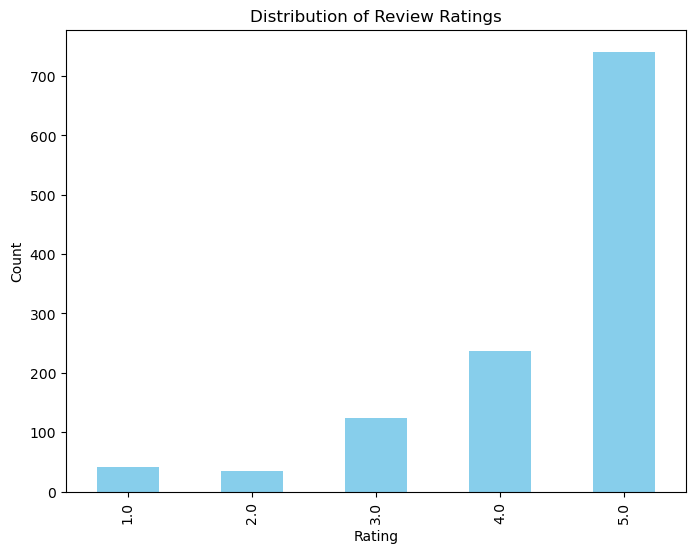

In [23]:
# Distribution of Review Ratings
plt.figure(figsize=(8, 6))
df_filtered['reviews.rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Review Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


In [6]:
def rating_to_sentiment(rating):
    if rating >= 4: return 'positive'
    elif rating == 3: return 'neutral'
    else: return 'negative'

df['sentiment'] = df['reviews.rating'].apply(rating_to_sentiment)


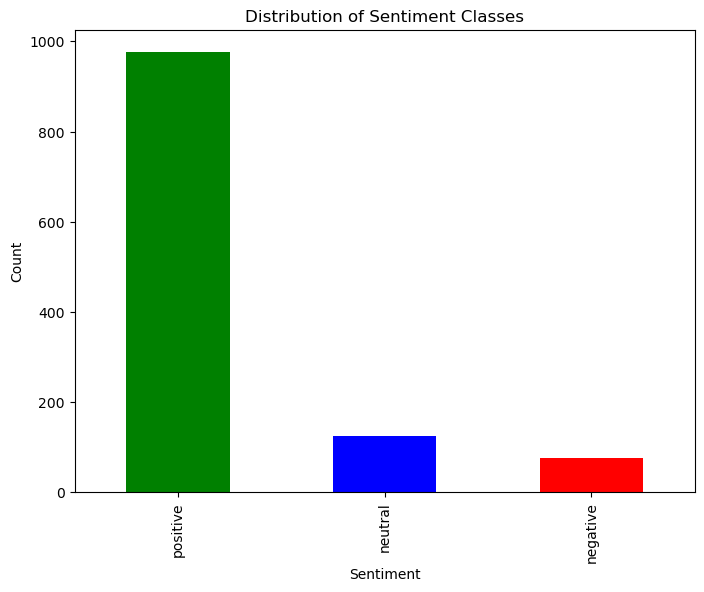

In [22]:

# Distribution of Sentiment Classes
plt.figure(figsize=(8, 6))
df_filtered['sentiment'].value_counts().plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Distribution of Sentiment Classes')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import re

# Dropping rows where review rating is missing
df_filtered = df.dropna(subset=['reviews.rating'])


# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_filtered['cleaned_text'], df_filtered['sentiment'], test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Model training using Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(X_train_tfidf, y_train)

# Predicting the test set results and generating the classification report
y_pred = model.predict(X_test_tfidf)
report = classification_report(y_test, y_pred, output_dict=True)

# Show the precision, recall, f1-score for each class
pd.DataFrame(report).transpose()


/Users/harikakakumanu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/harikakakumanu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/harikakakumanu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

,precision,recall,f1-score,support
negative,0.000000,0.000000,0.000000,15.000000
neutral,1.000000,0.476190,0.645161,21.000000
positive,0.884956,1.000000,0.938967,200.000000
accuracy,0.889831,0.889831,0.889831,0.889831
macro avg,0.628319,0.492063,0.528043,236.000000
weighted avg,0.838946,0.889831,0.853143,236.000000


In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Histogram of predicted probabilities
plt.figure(figsize=(8, 6))
plt.hist(y_pred[:, 1], bins=20, color='skyblue', alpha=0.7)
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()

In [9]:
pip install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/f9/14/67e9b2b2379cb530c0412123a674d045eca387dfcfa7db1c0028857b0a66/tensorflow-2.16.1-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2dbd0ad4182ef2d53488bb02e58694cd79d61369e85900/flatbuffers-24.3.25-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 from https://files.pythonhosted.org/packages/fa/39/5aae571

  Obtaining dependency information for tensorboard-data-server<0.8.0,>=0.7.0 from https://files.pythonhosted.org/packages/7a/13/e503968fefabd4c6b2650af21e110aa8466fe21432cd7c43a84577a89438/tensorboard_data_server-0.7.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.0/227.0 MB 1.1 MB/s eta 0:00:0000:01m00:07
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 2.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 3.1 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 4.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 2.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.8/389.8 kB 2.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.7 M

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Tokenization and padding
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)
padded_train = pad_sequences(sequences_train, maxlen=200, truncating='post', padding='post')
padded_test = pad_sequences(sequences_test, maxlen=200, truncating='post', padding='post')

# Label encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# One-hot encode the labels
num_classes = len(label_encoder.classes_)
y_train_encoded = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_encoded = to_categorical(y_test_encoded, num_classes=num_classes)

# Model definition
model = Sequential([
    Embedding(input_dim=5000, output_dim=16),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dense(24, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
model.fit(padded_train, y_train_encoded, epochs=10, validation_data=(padded_test, y_test_encoded), callbacks=[early_stopping])


Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.7198 - loss: 0.9028 - val_accuracy: 0.8475 - val_loss: 0.5392
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.8238 - loss: 0.5763 - val_accuracy: 0.8475 - val_loss: 0.5194
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.8518 - loss: 0.5081 - val_accuracy: 0.8729 - val_loss: 0.4901
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.8776 - loss: 0.4720 - val_accuracy: 0.8432 - val_loss: 0.5139
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.8729 - loss: 0.4678 - val_accuracy: 0.8729 - val_loss: 0.4576
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.8980 - loss: 0.3895 - val_accuracy: 0.8644 - val_loss: 0.4675
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.8959 - loss: 0.3766 - val_accuracy: 0.8390 - val_loss: 0.5266
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.8888 - loss: 0.3899 - val_accuracy: 0.8475 - v

In [17]:
from sklearn.metrics import classification_report

# Predict probabilities for each class
y_pred_prob = model.predict(padded_test)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert one-hot encoded test labels back to categorical labels
y_test_categorical = np.argmax(y_test_encoded, axis=1)

# Generate classification report
report = classification_report(y_test_categorical, y_pred)
print(report)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.47      0.38      0.42        21
           2       0.88      0.96      0.92       200

    accuracy                           0.85       236
   macro avg       0.45      0.45      0.45       236
weighted avg       0.78      0.85      0.81       236



/Users/harikakakumanu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/harikakakumanu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/harikakakumanu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [ ]:
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Define BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=3)

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# One-hot encode the labels
num_classes = len(label_encoder.classes_)
y_train_encoded = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_encoded = to_categorical(y_test_encoded, num_classes=num_classes)

# Convert labels to tensors
y_train_tensor = torch.tensor(y_train_encoded)
y_test_tensor = torch.tensor(y_test_encoded)

# Tokenize input texts
train_encodings = tokenizer(list(X_train), truncation=True, padding=True)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True)

# Create custom dataset
class CustomDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create datasets using the updated labels
train_dataset = CustomDataset(train_encodings, y_train_tensor)
test_dataset = CustomDataset(test_encodings, y_test_tensor)

# Define training parameters
batch_size = 8
epochs = 3
learning_rate = 2e-5

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define optimizer and loss function
optimizer = AdamW(model.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss()

# Train the model
model.train()
for epoch in range(epochs):
    print(f'Epoch {epoch + 1}/{epochs}')
    running_loss = 0.0
    for batch in tqdm(train_loader):
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
        attention_mask = batch['attention_mask'].to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
        labels = batch['labels'].to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Training loss: {running_loss / len(train_loader)}')


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Users/harikakakumanu/anaconda3/lib/python3.11/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/3


  0%|                                                   | 0/118 [00:00<?, ?it/s]/var/folders/kj/kpxsswjj06q2gg4ql6v6ggdc0000gn/T/ipykernel_41949/2627549654.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])
 25%|██████████▋                               | 30/118 [46:09<31:59, 21.81s/it]

In [32]:
from sklearn.metrics import classification_report

# Evaluate the model
model.eval()
y_true = []
y_pred = []
for batch in tqdm(test_loader):
    with torch.no_grad():
        input_ids = batch['input_ids'].to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
        attention_mask = batch['attention_mask'].to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
        labels = batch['labels'].to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
        outputs = model(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=1)
        y_true.extend(labels.cpu().numpy())  # Convert tensor to numpy array
        y_pred.extend(predictions.cpu().numpy())  # Convert tensor to numpy array

# Convert one-hot encoded labels back to their original format
y_true = label_encoder.inverse_transform(np.argmax(y_true, axis=1))
y_pred = label_encoder.inverse_transform(y_pred)

# Generate classification report
report = classification_report(y_true, y_pred)
print(report)


  0%|                                                    | 0/30 [00:00<?, ?it/s]/var/folders/kj/kpxsswjj06q2gg4ql6v6ggdc0000gn/T/ipykernel_41949/1332303399.py:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])
100%|███████████████████████████████████████████| 30/30 [01:40<00:00,  3.34s/it]

              precision    recall  f1-score   support

    negative       0.73      0.53      0.62        15
     neutral       1.00      0.38      0.55        21
    positive       0.92      1.00      0.96       200

    accuracy                           0.92       236
   macro avg       0.88      0.64      0.71       236
weighted avg       0.92      0.92      0.90       236

